# Project: Grading System

In [3]:
import string
import random
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [4]:
lower_case_letters = string.ascii_lowercase
upper_case_letters = string.ascii_uppercase
digits = string.digits
punctuations = string.punctuation

In [5]:
# number of students
number_students = 100

### Names

In [7]:
random.seed(0)

names = []
for i in range(number_students):
    length_name = random.choice(range(3,7))
    name = ''
    for i in range(length_name):
        name += random.choice(lower_case_letters)
    names.append(name.capitalize())

names[:5]

['Ynbiqp', 'Zjplsg', 'Jeyd', 'Rwzte', 'Dxcvk']

## Grades

In [9]:
random.seed(0)
grade_list = [9,10,11,12]
grades = [random.choice(grade_list)  for i in range(number_students)]
grades[:10]

[12, 12, 9, 11, 12, 12, 11, 12, 11, 10]

## Test Scores

In [11]:
random.gauss(mu=70, sigma=5)

72.15905718422292

In [12]:
random.seed(0)
test1 = [int(random.gauss(mu=80, sigma=15))  for i in range(number_students) ]
test2 = [int(random.gauss(mu=75, sigma=15))  for i in range(number_students) ]
test3 = [int(random.gauss(mu=80, sigma=10))  for i in range(number_students) ]
test4 = [int(random.gauss(mu=70, sigma=20))  for i in range(number_students) ]
final = [int(random.gauss(mu=70, sigma=20))  for i in range(number_students) ]

In [13]:
exam_list = [test1, test2, test3, test4, final]
exam_names = ['test1', 'test2', 'test3', 'test4', 'final']

In [14]:
exam_names = []
for exam in exam_list:
    exam_names.append([name for name in globals() if globals()[name] == exam][0])
exam_names

['test1', 'test2', 'test3', 'test4', 'final']

In [15]:
# extra point for higher grades
for exam in exam_list:
    for i in range(number_students):
        exam[i] += (grades[i] - 9)*3

In [16]:
for exam in exam_list:
    print(f'Exam: {[name for name in globals() if globals()[name] == exam][0]}    Maximum: {max(exam):<5}   Minimum: {min(exam):<5}')

Exam: test1    Maximum: 125     Minimum: 50   
Exam: test2    Maximum: 115     Minimum: 40   
Exam: test3    Maximum: 118     Minimum: 56   
Exam: test4    Maximum: 122     Minimum: 29   
Exam: final    Maximum: 123     Minimum: 27   


In [17]:
for exam in exam_list:
    for score in exam:
        if score > 100:
            exam.insert(exam.index(score), 100)
            exam.remove(score)        
        if score < 0:
            exam.insert(exam.index(score), 0)
            exam.remove(score)

In [18]:
for exam in exam_list:
    print(f'Exam: {[name for name in globals() if globals()[name] == exam][0]}    Maximum: {max(exam):<5}   Minimum: {min(exam):<5}')

Exam: test1    Maximum: 100     Minimum: 50   
Exam: test2    Maximum: 100     Minimum: 40   
Exam: test3    Maximum: 100     Minimum: 56   
Exam: test4    Maximum: 100     Minimum: 29   
Exam: final    Maximum: 100     Minimum: 27   


### Weighted Score

In [20]:
weighted_scores = [ 0.15*(test1[i]+test2[i]+test3[i]+test4[i])+0.40*final[i] for i in range(number_students)]

### Final Letter Grades

In [22]:
letter_grades = []
for i in range(number_students):
    if weighted_scores[i] >= 90: letter_grades.append('A')
    elif weighted_scores[i] >= 80: letter_grades.append('B')
    elif weighted_scores[i] >= 70: letter_grades.append('C')
    elif weighted_scores[i] >= 60: letter_grades.append('D')
    else: letter_grades.append('F')

letter_grades[:10]

['B', 'D', 'C', 'B', 'C', 'B', 'A', 'B', 'B', 'C']

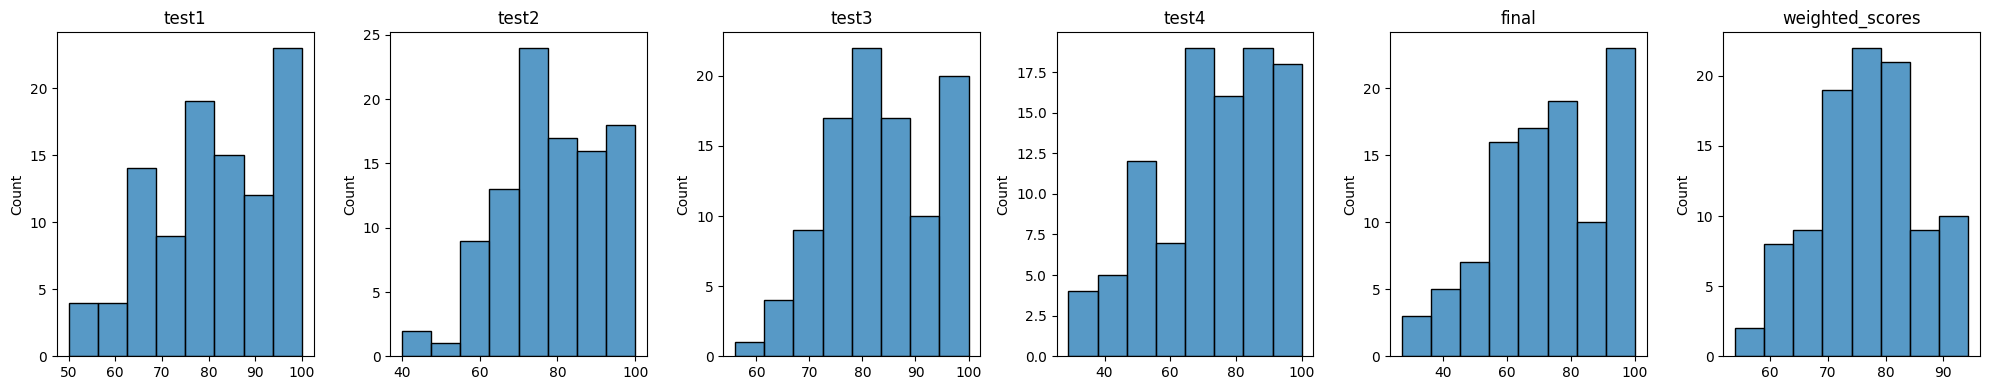

In [23]:
plt.figure(figsize=(20,4))
for i in range(1,6):
    plt.subplot(1,6,i)
    plt.title(exam_names[i-1])
    sns.histplot(exam_list[i-1])
    plt.tight_layout()
    
    
plt.subplot(1,6,6)
plt.title('weighted_scores')
sns.histplot(weighted_scores);

In [24]:
letter_grades.count('F')

3

## Drop Lowest Test Score

In [26]:
student_dict = {}
for i in range(number_students):
    student_dict[names[i]] = [test1[i], test2[i], test3[i], test4[i], final[i]]

for name in list(student_dict.keys())[:5]:
    print(f'{name:<7}  {student_dict[name]}')

Ynbiqp   [100, 64, 81, 100, 87]
Zjplsg   [68, 62, 91, 51, 51]
Jeyd     [69, 76, 86, 56, 82]
Rwzte    [91, 100, 96, 62, 76]
Dxcvk    [73, 91, 76, 100, 63]


In [27]:
for i in range(number_students):
    student_dict[names[i]].remove(min(student_dict[names[i]][:-1])) 

for name in list(student_dict.keys())[:5]:
    print(f'{name:<7}  {student_dict[name]}')

Ynbiqp   [100, 81, 100, 87]
Zjplsg   [68, 62, 91, 51]
Jeyd     [69, 76, 86, 82]
Rwzte    [91, 100, 96, 76]
Dxcvk    [91, 76, 100, 63]


### Weighted Scores-2

In [29]:
weighted_scores2 = []
for grade in student_dict.values():
    weighted_scores2.append(0.20*(grade[0]+grade[1]+grade[2])+0.40*grade[3])

### Final Letter Grades-2

In [31]:
letter_grades2 = []
for i in range(number_students):
    if weighted_scores2[i] >= 90: letter_grades2.append('A')
    elif weighted_scores2[i] >= 80: letter_grades2.append('B')
    elif weighted_scores2[i] >= 70: letter_grades2.append('C')
    elif weighted_scores2[i] >= 60: letter_grades2.append('D')
    else: letter_grades2.append('F')

letter_grades2[:10]

['A', 'D', 'C', 'B', 'C', 'B', 'A', 'B', 'B', 'C']

In [32]:
letter_grades2.count('F')

1

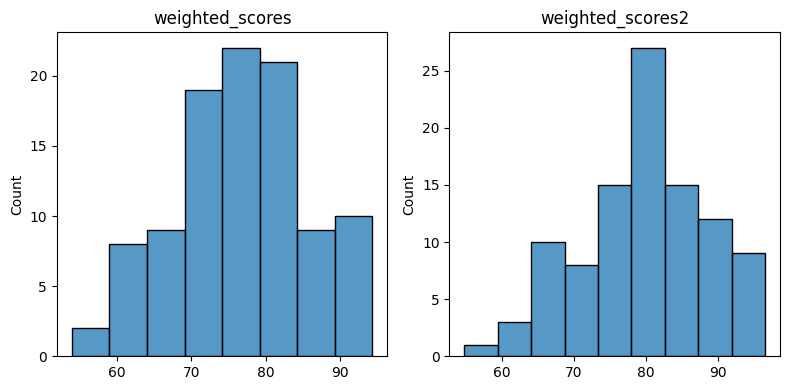

In [33]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.title('weighted_scores')
sns.histplot(weighted_scores)
plt.subplot(1,2,2)
plt.title('weighted_scores2')
sns.histplot(weighted_scores2)
plt.tight_layout();

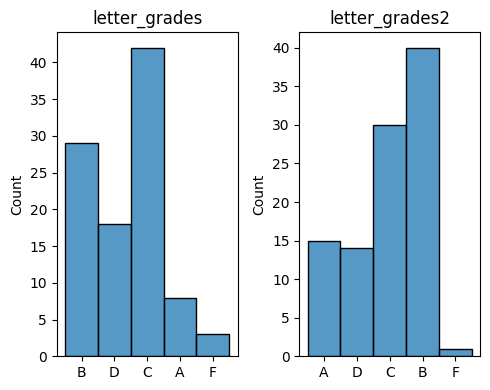

In [34]:
plt.figure(figsize=(5,4))
plt.subplot(1,2,1)
plt.title('letter_grades')
sns.histplot(letter_grades)
plt.subplot(1,2,2)
plt.title('letter_grades2')
sns.histplot(letter_grades2)
plt.tight_layout();

## Grade Analysis

In [36]:
grade_dict={i:{j:[] for j in exam_names} for i in grade_list}

for i in range(number_students):
    for j in range(len(exam_names)):
        grade_dict[grades[i]][exam_names[j]].append(exam_list[j][i])


In [37]:
# number of students
for grade, exam_scores in grade_dict.items():
    print(f'Grade: {grade:<2}', end=' ')
    for exam, score in  exam_scores.items():
        print(f'{exam}:{len(score)}', end=' ')
    print()

Grade: 9  test1:26 test2:26 test3:26 test4:26 final:26 
Grade: 10 test1:24 test2:24 test3:24 test4:24 final:24 
Grade: 11 test1:28 test2:28 test3:28 test4:28 final:28 
Grade: 12 test1:22 test2:22 test3:22 test4:22 final:22 


### Grade Based

In [39]:
for grade in grade_dict:
    for exam in exam_names:
        print(f'Grade: {grade:<10} {exam} Mean: {np.mean(grade_dict[grade][exam]):.2f} ')
    print('-'*40)

Grade: 9          test1 Mean: 76.27 
Grade: 9          test2 Mean: 70.50 
Grade: 9          test3 Mean: 76.88 
Grade: 9          test4 Mean: 64.62 
Grade: 9          final Mean: 67.23 
----------------------------------------
Grade: 10         test1 Mean: 81.08 
Grade: 10         test2 Mean: 79.25 
Grade: 10         test3 Mean: 84.12 
Grade: 10         test4 Mean: 75.00 
Grade: 10         final Mean: 72.58 
----------------------------------------
Grade: 11         test1 Mean: 84.64 
Grade: 11         test2 Mean: 79.93 
Grade: 11         test3 Mean: 86.75 
Grade: 11         test4 Mean: 74.39 
Grade: 11         final Mean: 81.25 
----------------------------------------
Grade: 12         test1 Mean: 82.55 
Grade: 12         test2 Mean: 84.32 
Grade: 12         test3 Mean: 85.95 
Grade: 12         test4 Mean: 79.36 
Grade: 12         final Mean: 70.64 
----------------------------------------


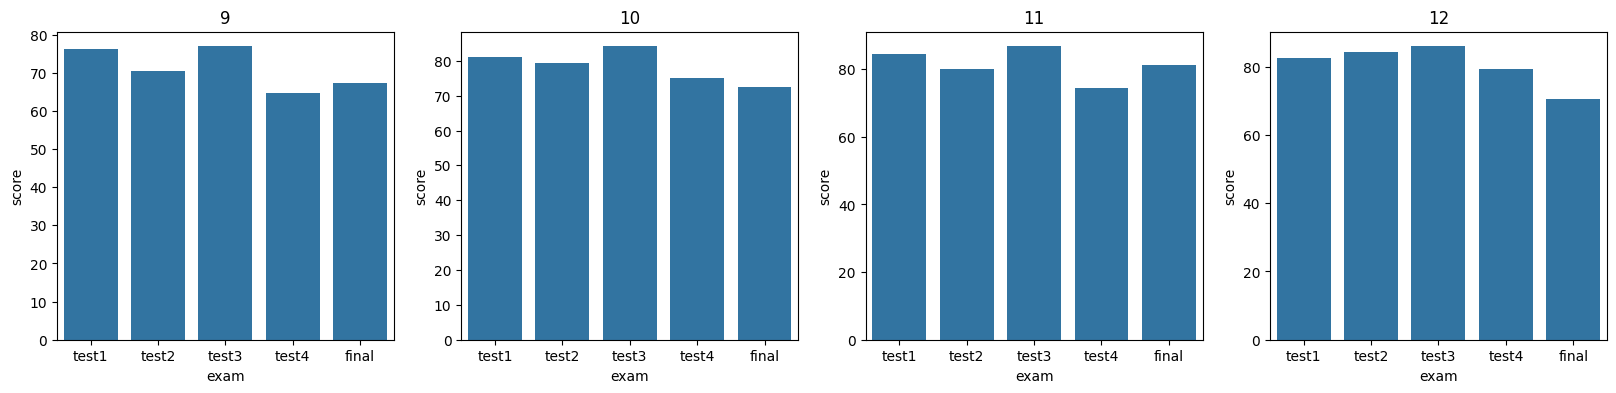

In [40]:
plt.figure(figsize=(20,4))
k = 1
for grade in grade_list:
    plt.subplot(1,4,k)
    sns.barplot(x=exam_names, y=[np.mean(grade_dict[grade][exam]) for exam in exam_names])
    plt.title(grade)
    plt.xlabel('exam')
    plt.ylabel('score')
    k += 1

### Exam Based

In [42]:
for exam in exam_names:
    for grade in grade_dict:
        print(f'Grade: {grade:<5} {exam} Mean: {np.mean(grade_dict[grade][exam]):.2f} ')
    print('-'*40)

Grade: 9     test1 Mean: 76.27 
Grade: 10    test1 Mean: 81.08 
Grade: 11    test1 Mean: 84.64 
Grade: 12    test1 Mean: 82.55 
----------------------------------------
Grade: 9     test2 Mean: 70.50 
Grade: 10    test2 Mean: 79.25 
Grade: 11    test2 Mean: 79.93 
Grade: 12    test2 Mean: 84.32 
----------------------------------------
Grade: 9     test3 Mean: 76.88 
Grade: 10    test3 Mean: 84.12 
Grade: 11    test3 Mean: 86.75 
Grade: 12    test3 Mean: 85.95 
----------------------------------------
Grade: 9     test4 Mean: 64.62 
Grade: 10    test4 Mean: 75.00 
Grade: 11    test4 Mean: 74.39 
Grade: 12    test4 Mean: 79.36 
----------------------------------------
Grade: 9     final Mean: 67.23 
Grade: 10    final Mean: 72.58 
Grade: 11    final Mean: 81.25 
Grade: 12    final Mean: 70.64 
----------------------------------------


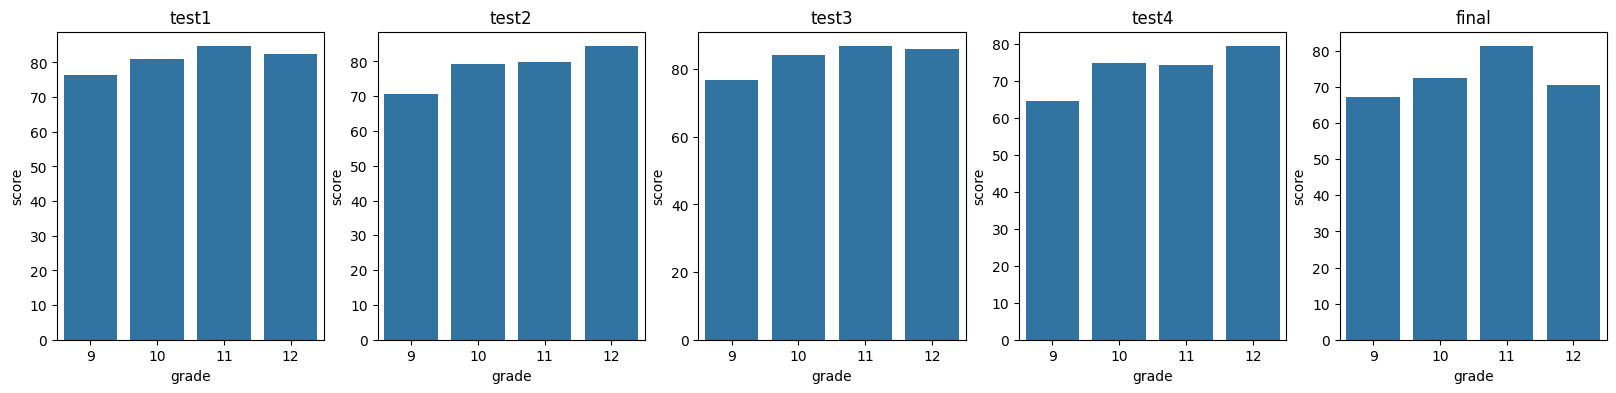

In [43]:
plt.figure(figsize=(20,4))
k = 1
for exam in exam_names:
    plt.subplot(1,5,k)
    sns.barplot(x=grade_list, y=[np.mean(grade_dict[grade][exam]) for grade in grade_list])
    plt.title(exam)
    plt.xlabel('grade')
    plt.ylabel('score')
    k += 1